In [1]:
import numpy as np
from PIL import Image

In [37]:
def process_grayscale_image(image_path, target_size=(60, 60)):
    # Step 1: Load the image and convert to grayscale
    image = Image.open(image_path).convert("L")  # "L" mode converts the image to grayscale
    
    # Step 2: Resize the image
    image_resized = image.resize(target_size)
    
    # Step 3: Convert the image to a numpy matrix
    image_matrix = np.array(image_resized)
    
    # Step 4: Vectorize the image
    image_vector = image_matrix.flatten()
    
    return image_matrix, image_vector

# Example usage
image_path = 'cat.png'  # Replace with your black-and-white image path
matrix, vector = process_grayscale_image(image_path)

print(f"Grayscale Image Matrix Shape: {matrix.shape}")  # e.g., (960, 960)
print(f"Grayscale Image Vector Length: {len(vector)}")  # e.g., 960*960

image_path = 'dog.jpg'  # Replace with your black-and-white image path
matrix_d, vector_d = process_grayscale_image(image_path)


Grayscale Image Matrix Shape: (60, 60)
Grayscale Image Vector Length: 3600


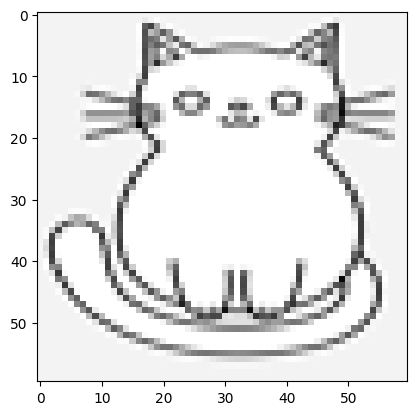

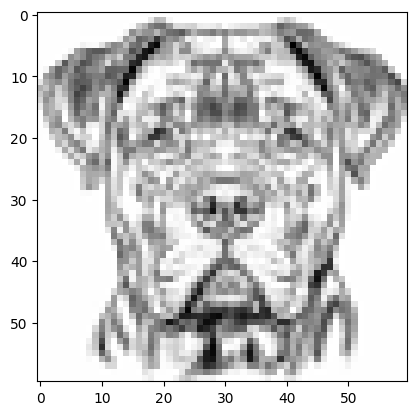

In [40]:
#invert matrix
inverse = np.invert(matrix)

#plot matrix as image
import matplotlib.pyplot as plt
plt.imshow(matrix, cmap='gray')
plt.show()
plt.imshow(matrix_d, cmap='gray')
plt.show()


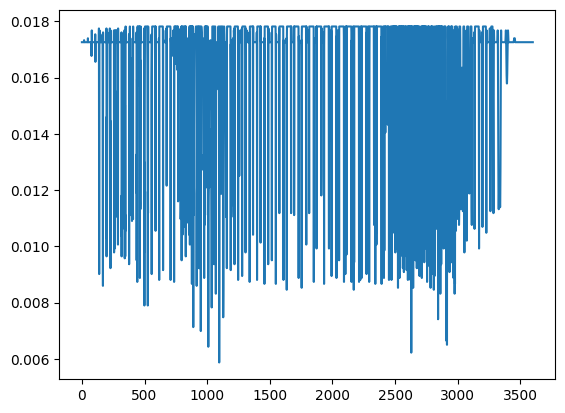

In [42]:
vector
norm_vec = (vector/np.linalg.norm(vector) )
dog_vec = (vector_d/np.linalg.norm(vector_d) )
#plot vector of the cat
plt.plot(norm_vec)    
plt.show()


In [44]:
norm_vec= norm_vec+0j
dog_vec= dog_vec+0j

In [51]:
def gen_base(H, V, dx, dy, wavelength, f):

    """

    gen_base - Function to generate a structured grid (meshgrid) and related parameters.

    Parameters:

        H (int): Number of horizontal grid points (columns).

        V (int): Number of vertical grid points (rows).

        dx (float): Grid spacing in the horizontal direction (x-axis).

        dy (float): Grid spacing in the vertical direction (y-axis).

        wavelength (float): Wavelength of interest (not used directly in this function but passed for flexibility).

        f (float): Focal length (not used directly in this function but passed for flexibility).

    Returns:

        dict: A dictionary containing spatial and frequency domain mesh grids, grid spacings, and polar coordinates.

    """

    # Generate the spatial domain grid points for y (vertical axis)

    y = np.linspace(-(V / 2), (V / 2) - 1, V) * dy  # Scaled by vertical spacing (dy)

    # Generate the spatial domain grid points for x (horizontal axis)

    x = np.linspace(-(H / 2), (H / 2) - 1, H) * dx  # Scaled by horizontal spacing (dx)

    # Generate the frequency domain grid points for fy (vertical frequencies)

    fy =  y/ (wavelength *f)  # Normalized by grid spacing and size np.linspace(-(V / 2), (V / 2) - 1, V)*dy

    # Generate the frequency domain grid points for fx (horizontal frequencies)

    fx = x/ (wavelength * f)  # Normalized by grid spacing and size  np.linspace(-(H / 2), (H / 2) - 1, H)*dx 

    # Create the spatial domain meshgrid (Cartesian coordinates)

    X, Y = np.meshgrid(x, y)

    # Create the frequency domain meshgrid

    FX, FY = np.meshgrid(fx, fy)

    # Convert spatial domain coordinates to polar coordinates

    r = np.sqrt(X**2 + Y**2)  # Radius

    phi = np.arctan2(Y, X)    # Angle in radians

    # Store all grids and parameters in a dictionary

    base = {

        "y": y,      # Vertical grid points

        "x": x,      # Horizontal grid points

        "dx": dx,    # Grid spacing in x

        "dy": dy,    # Grid spacing in y

        "H": H,      # Number of horizontal points

        "V": V,      # Number of vertical points

        "X": X,      # Meshgrid for x-coordinates (spatial domain)

        "Y": Y,      # Meshgrid for y-coordinates (spatial domain)

        "FX": FX,    # Meshgrid for fx-coordinates (frequency domain)

        "FY": FY,    # Meshgrid for fy-coordinates (frequency domain)

        "phi": phi,  # Polar coordinate angles

        "r": r       # Polar coordinate radii

    }


    return base

Mesh = gen_base(60, 60, 8e-6, 8e-6, 633e-9,15e-3)
Mesh['FX']*Mesh['X']

array([[6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       ...,
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772]])

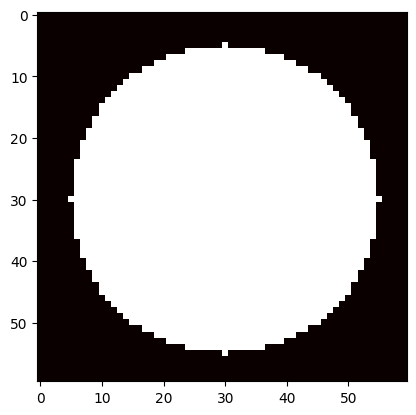

In [52]:

A = np.zeros((60, 60))+0j

A[Mesh['r']<0.2e-3] = 1

#DIsplay as heatmap
plt.imshow(np.abs(A), cmap='hot', interpolation='nearest')
plt.show()


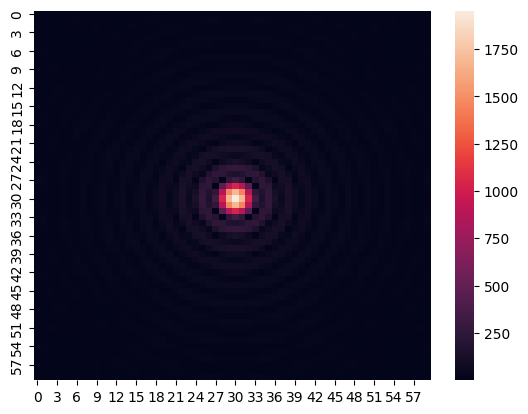

In [ ]:
#Matrix Diffraction
ffx = np.exp(-2j * np.pi * Mesh['FX'].T*Mesh['X'])
ffy = np.exp(-2j * np.pi * Mesh['FY'].T*Mesh['Y'])
res = ffx@A@(ffy)

#plot seaborn heatmap
import seaborn as sns
sns.heatmap(np.abs(res))
plt.show()


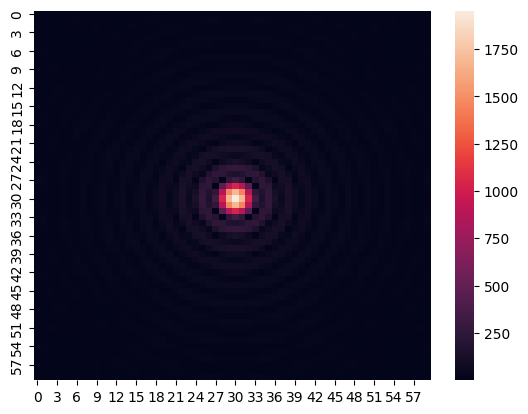

In [ ]:
#Vectorized diffraction
#tensor product of the two matrices Fx and Fy	
F = np.kron(ffx, ffy)
vecA = A.flatten()
res = F@vecA
res = res.reshape(60,60)
sns.heatmap(np.abs(res))
plt.show()


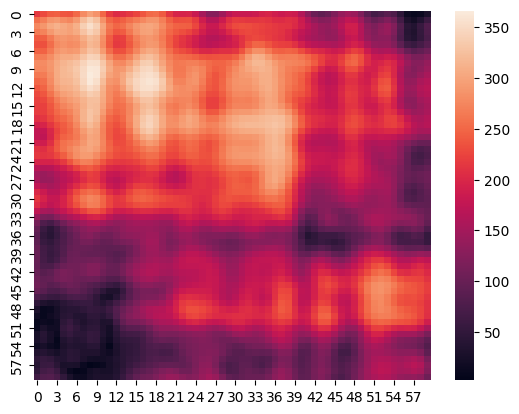

In [102]:
vec = norm_vec

# Diagonal phase matrix with random angles
D = lambda theta : np.diag(np.exp(1j*theta*2*np.pi))

#initialization of the diagonal matrix
# Diagonal_i = D(np.random.rand(3600))
# res_i = Diagonal_i@res_i

def Optical_layers(phases , vec):
    # 2 layered network
    #fourier transform and Diagonal Phase matrix
    return D(phases[3600:7200])@(F@(D(phases[0:3600])@(F@vec)))  

    #1 layer Network
    # return D(phases[0:3600])@(F@vec)

#random initialization of the phases
phases = np.random.rand(7200)

#1 layer network output
res_f_1 = Optical_layers(phases,vec).reshape(60,60)
sns.heatmap(np.abs(res_f_1))
plt.show()

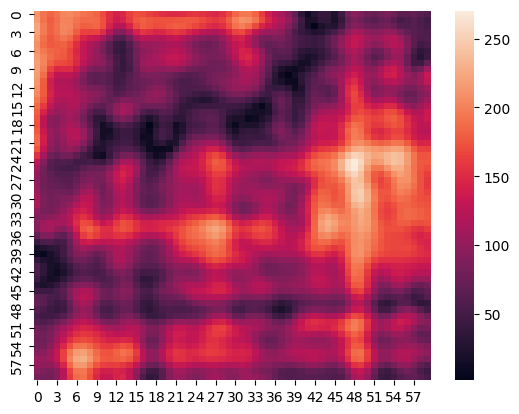

In [ ]:
vec = norm_vec.flatten()
res_f_2 = Optical_layers(phases,vec).reshape(60,60)
#2 layer network output
sns.heatmap(np.abs(res_f_2))
plt.show()

In [103]:
#Cost function: Mean Squared Error between dog and cat
def cost_function(phases):
    return np.mean(np.abs(Optical_layers(phases,vec)-dog_vec)**2)

phases = np.random.rand(7200)
#Cost function for the 1 layer network
#Use of the scipy optimization library to minimize the cost function
from scipy.optimize import minimize
res = minimize(cost_function, phases, method='COBYLA', options={'disp': True})
res

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 15073.683312832825
       x: [ 9.236e-01  9.736e-01 ...  9.977e-01  7.240e-01]
    nfev: 1000
   maxcv: 0.0

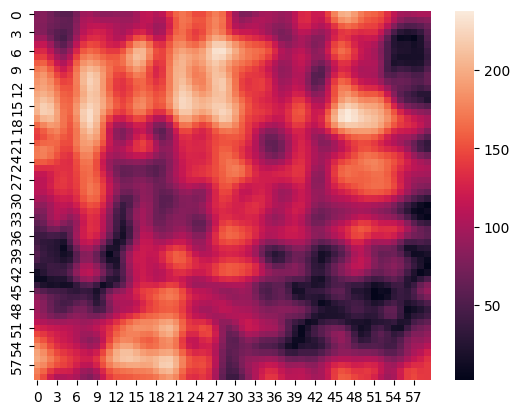

In [104]:
out = Optical_layers(res.x,vec)
out = out.reshape(60,60)
sns.heatmap(np.abs(out))
plt.show()